Installare le due librerie indicate sotto

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}


Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
path = "../Dataset FFF/"

In [3]:
path_graph = '../Dataset FFF/Graph_data/'

In [4]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [5]:
community_path = "../Dataset FFF/Community_task/"

In [1]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [2]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [3]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

# 2 - Label Propagation

In [23]:
labelprop_coms = algorithms.label_propagation(G)

In [24]:
print(print_bold_str("Average Internal Degree:"), labelprop_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), labelprop_coms.internal_edge_density())
print(print_bold_str("Conductance:"), labelprop_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), labelprop_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), labelprop_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), labelprop_coms.modularity_density())
print(print_bold_str("Z Modularity:"), labelprop_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), labelprop_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(labelprop_coms.communities))

max_com_len = 0
for com in labelprop_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len) 

Average Internal Degree: FitnessResult(min=1.0, max=12.685982452560703, score=2.0967107607606343, std=2.0332478220517296)
Internal Edge Density: FitnessResult(min=0.0012943559282278035, max=1.0, score=0.9563621848774981, std=0.14071607265923827)
Conductance: FitnessResult(min=0.0, max=0.6666666666666666, score=0.3012694464998566, std=0.2089837532909423)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.09126671211394395, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.02805996670742078, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=176.73125557024764, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=0.14025287454877552, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.39399866102992065, std=0.48337176377397495)
N_Community: 172
Max_Dim_Community: 9802


In [25]:
with open(community_path+'labelprop.pickle', 'wb') as f:
    pickle.dump(labelprop_coms, f)

In [26]:
labelprop_tuple = [tuple(x) for x in labelprop_coms.communities]

{'9802': 1, '15': 1, '13': 1, '12': 1, '11': 1, '10': 2, '9': 2, '8': 5, '7': 3, '6': 6, '5': 6, '4': 14, '3': 29, '2': 100}


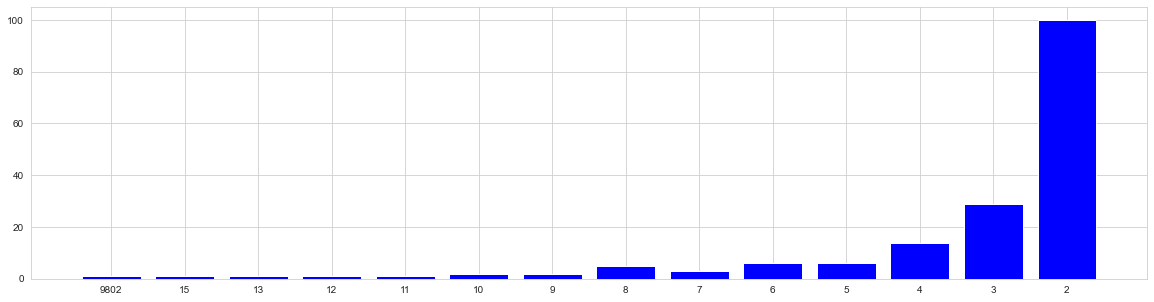

In [27]:
plot_communities_dimentions(labelprop_tuple)

In [28]:
results = pquality.pquality_summary(G, labelprop_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.001294,1.000000,0.956362,0.140716
Edges inside,1.000000,62174.000000,366.761628,4726.529492
Average Degree,1.000000,12.685982,2.096711,2.033248
FOMD,0.000000,0.500000,0.028572,0.093695
TPR,0.000000,1.000000,0.393999,0.483372
Expansion,0.000000,7.000000,1.069203,1.139274
Cut Ratio,0.000000,0.000676,0.000104,0.000110
Conductance,0.000000,0.666667,0.301269,0.208984
Normalized Cut,0.000000,0.666698,0.302449,0.207924


In [29]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.02806


# 3 - Demon

Parametri ottimizzati con grid_search

In [30]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.6, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

In [31]:
coms_demon, scoring = ensemble.random_search(graph=G, method=algorithms.demon,
                                                       parameters=[eps, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms_demon.communities, coms_demon.method_parameters, scoring))

Communities:
 [['069forclimate', '100actions4nature', '100debates', '100tage', '10milliontreesug', '10vor10', '11febbraio', '11thhfc', '11thhourforclimat', '11thhourforclimate', '12062020olympia', '12monatenixpassiert', '12octubre', '13dic', '13dicembre', '13mars', '16avril', '17daystolearn', '17punkteplan', '18aprile', '18marzo', '1984exklusiv', '1day', '1jahrnurblockiert', '1komma5', '1may', '1mayis', '1mayisemekvedayanismagunu', '1o5c', '1point5', '2019in5words', '2020ends', '2020newyear', '2020rebeliónporelclima', '2020rebellionporelclima', '2020wefighton', '2020werdenwir', '2020yearofclimateaction', '2021year', '2030now', '20agosto', '20s', '20septiembre', '20settembre', '21for21', '23nisan', '24nov', '24s', '24sept', '24septiembre', '24settembre', '25s', '25sclimaytrabajo', '25settembre', '26sep', '26settembre', '27aprile', '27novembre', '27s', '27sep', '27septembre', '27settembre', '27shuelgamundialporelclima', '28settembre', '29m', '29n', '29november', '29novembre', '29settembr

In [32]:
print(print_bold_str("Average Internal Degree:"), coms_demon.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), coms_demon.internal_edge_density())
print(print_bold_str("Conductance:"), coms_demon.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), coms_demon.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), coms_demon.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), coms_demon.modularity_density())
print(print_bold_str("Z Modularity:"), coms_demon.z_modularity())

Average Internal Degree: FitnessResult(min=2.8, max=24.18020304568528, score=8.936478526283997, std=5.448851556197657)
Internal Edge Density: FitnessResult(min=0.002080137586898975, max=1.0, score=0.6556032169611348, std=0.38387289793745843)
Conductance: FitnessResult(min=0.07397623408779212, max=0.9982198486871384, score=0.908103740948848, std=0.17773476208975775)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=5.415679103035645, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.1948876232448282, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-182457.09240082448, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=nan, std=None)


In [33]:
print(print_bold_str("N_Community:"), len(coms_demon.communities))

max_com_len = 0
for com in coms_demon.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

N_Community: 230
Max_Dim_Community: 6955


In [34]:
with open(community_path+'demon.pickle', 'wb') as f:
    pickle.dump(coms_demon, f)

In [35]:
demon_tuple = [tuple(x) for x in coms_demon.communities]

In [36]:
print("Numero di communities: ", len(demon_tuple))

Numero di communities:  230


{'6955': 1, '4108': 1, '3305': 1, '2446': 1, '2238': 1, '2207': 1, '2088': 1, '2021': 1, '1876': 1, '1814': 1, '1763': 1, '963': 1, '788': 1, '784': 1, '704': 1, '693': 1, '638': 1, '623': 1, '561': 1, '529': 1, '452': 1, '426': 1, '422': 1, '399': 1, '345': 1, '341': 1, '302': 1, '292': 1, '261': 1, '254': 1, '210': 1, '208': 1, '191': 1, '180': 1, '170': 1, '167': 1, '148': 1, '135': 1, '134': 1, '133': 1, '118': 1, '116': 1, '114': 1, '110': 1, '109': 1, '98': 2, '89': 1, '86': 1, '85': 1, '82': 1, '55': 1, '54': 2, '52': 1, '51': 1, '50': 1, '42': 2, '41': 2, '37': 1, '34': 1, '31': 1, '30': 2, '29': 1, '27': 1, '24': 1, '22': 1, '21': 2, '20': 2, '19': 1, '17': 2, '16': 4, '15': 4, '14': 5, '13': 2, '12': 5, '11': 9, '10': 9, '9': 8, '8': 13, '7': 26, '6': 15, '5': 53}


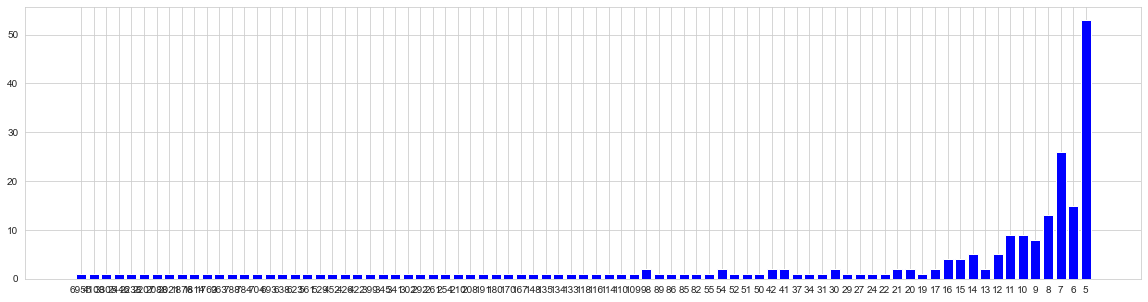

In [37]:
plot_communities_dimentions(demon_tuple)

In [38]:
results = pquality.pquality_summary(G, demon_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.002080,1.000000,0.655603,0.383873
Edges inside,7.000000,50303.000000,1808.086957,6045.857656
Average Degree,2.800000,24.180203,8.936479,5.448852
FOMD,0.000000,0.500000,0.196614,0.205852
TPR,1.000000,1.000000,1.000000,0.000000
Expansion,1.155572,2209.800000,802.228185,670.057804
Cut Ratio,0.000124,0.213384,0.077541,0.064642
Conductance,0.073976,0.998220,0.908104,0.177735
Normalized Cut,0.176541,1.081811,0.993947,0.153422


In [39]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.194888
